In [1]:
#take a dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer







In [2]:
dataset2=pd.read_csv('/content/BTC-2018min.csv')

In [3]:
dataset3=pd.read_csv('/content/BTC-2019min.csv')

In [4]:
dataset4=pd.read_csv('/content/BTC-2020min.csv')

In [5]:
dataset5=pd.read_csv('/content/BTC-2021min.csv')

In [6]:
dataset6=pd.read_csv('/content/BTC-Hourly.csv')

In [7]:
btc_ustd_df=pd.concat([dataset2,dataset3,dataset4,dataset5,dataset6])
btc_usdt_data=btc_ustd_df.sort_values(by='date')

In [8]:
df_cleaned=btc_usdt_data

In [9]:
df_cleaned.isnull().sum()


unix          0
date          0
symbol        0
open          0
high          1
low           1
close         2
Volume BTC    2
Volume USD    3
dtype: int64

In [10]:
df_cleaned.dropna(inplace=True)  # Drops rows with any null values directly in 'df'

In [11]:
df_cleaned


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,559.930000
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,273.580000
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,917.790000
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,182.620000
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1260.690000
...,...,...,...,...,...,...,...,...,...
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,2.221034e-02,956.143143
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,8.209500e-01,35300.390268
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,9.230000e-03,397.037957
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,1.429770e-01,6154.673021


In [12]:
df_cleaned.duplicated().sum()

1

In [13]:
df_cleaned1=df_cleaned.drop_duplicates(subset=['date','symbol','open','high','low','close','Volume BTC','Volume USD'])

In [14]:
df_cleaned1[['date','symbol','open','close','high','low','Volume BTC','Volume USD']].duplicated().sum()

0

In [15]:
df_cleaned1

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,559.930000
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,273.580000
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,917.790000
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,182.620000
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1260.690000
...,...,...,...,...,...,...,...,...,...
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,2.221034e-02,956.143143
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,8.209500e-01,35300.390268
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,9.230000e-03,397.037957
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,1.429770e-01,6154.673021


In [16]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557109 entries, 33258 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        557109 non-null  int64  
 1   date        557109 non-null  object 
 2   symbol      557109 non-null  object 
 3   open        557109 non-null  float64
 4   high        557109 non-null  float64
 5   low         557109 non-null  float64
 6   close       557109 non-null  float64
 7   Volume BTC  557109 non-null  float64
 8   Volume USD  557109 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 42.5+ MB


In [17]:
df_cleaned1.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,5.571090e+05,557109.000000,557109.000000,557109.000000,557109.000000,5.571090e+05,5.571090e+05
mean,1.586355e+09,16442.565838,16456.122399,16428.367086,16442.686561,9.626200e+04,2.226194e+05
std,3.692619e+07,14931.026767,14946.218495,14914.588771,14931.138923,8.488191e+05,1.924622e+06
min,1.526364e+09,3124.450000,3131.860000,3122.280000,3124.450000,0.000000e+00,0.000000e+00
25%,1.545294e+09,6539.080000,6540.260000,6537.970000,6539.230000,1.256519e-01,1.021601e+03
50%,1.576377e+09,8763.140000,8769.760000,8757.840000,8763.480000,9.663555e-01,8.708724e+03
75%,1.608488e+09,22780.000000,22802.850000,22753.060000,22779.940000,4.726783e+00,4.121276e+04
max,1.646106e+09,68635.050000,69000.000000,68447.000000,68627.010000,6.857061e+07,2.582324e+08


In [18]:
df_cleaned1.shape

(557109, 9)

In [19]:
df_cleaned1['date']=pd.to_datetime(df_cleaned1['date'])

<ipython-input-19-8dc94a72f5d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['date']=pd.to_datetime(df_cleaned1['date'])


In [20]:
df_cleaned1['year'] = df_cleaned1['date'].dt.year
df_cleaned1['month'] = df_cleaned1['date'].dt.month
df_cleaned1['day'] = df_cleaned1['date'].dt.day

<ipython-input-20-3ae3edc093ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['year'] = df_cleaned1['date'].dt.year
<ipython-input-20-3ae3edc093ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['month'] = df_cleaned1['date'].dt.month
<ipython-input-20-3ae3edc093ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [21]:
df_cleaned1['time'] = df_cleaned1['date'].dt.time


<ipython-input-21-4988e214130e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['time'] = df_cleaned1['date'].dt.time


In [22]:
df_cleaned1

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,time
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,559.930000,2018,5,15,06:00:00
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,273.580000,2018,5,15,07:00:00
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,917.790000,2018,5,15,08:00:00
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,182.620000,2018,5,15,09:00:00
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1260.690000,2018,5,15,10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,2.221034e-02,956.143143,2022,3,1,03:38:00
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,8.209500e-01,35300.390268,2022,3,1,03:39:00
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,9.230000e-03,397.037957,2022,3,1,03:40:00
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,1.429770e-01,6154.673021,2022,3,1,03:41:00


In [23]:
df_cleaned.drop(columns=['date'],inplace=True)


In [24]:
df_cleaned

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
33258,1526364000,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,559.930000
33257,1526367600,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,273.580000
33256,1526371200,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,917.790000
33255,1526374800,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,182.620000
33254,1526378400,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1260.690000
...,...,...,...,...,...,...,...,...
4,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,2.221034e-02,956.143143
3,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,8.209500e-01,35300.390268
2,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,9.230000e-03,397.037957
1,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,1.429770e-01,6154.673021


In [25]:
df_cleanedcopy = df_cleaned1.copy()


In [26]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557109 entries, 33258 to 0
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   unix        557109 non-null  int64         
 1   date        557109 non-null  datetime64[ns]
 2   symbol      557109 non-null  object        
 3   open        557109 non-null  float64       
 4   high        557109 non-null  float64       
 5   low         557109 non-null  float64       
 6   close       557109 non-null  float64       
 7   Volume BTC  557109 non-null  float64       
 8   Volume USD  557109 non-null  float64       
 9   year        557109 non-null  int32         
 10  month       557109 non-null  int32         
 11  day         557109 non-null  int32         
 12  time        557109 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(2)
memory usage: 53.1+ MB


In [27]:

df_cleaned1['unix'] = pd.to_numeric(df_cleaned1['unix'], errors='coerce')


covariance_matrix = df_cleaned1.select_dtypes(include=['number']).cov()
print(covariance_matrix)

                    unix          open          high           low  \
unix        1.363543e+15  4.849736e+11  4.853547e+11  4.845636e+11   
open        4.849736e+11  2.229356e+08  2.231608e+08  2.226880e+08   
high        4.853547e+11  2.231608e+08  2.233894e+08  2.229120e+08   
low         4.845636e+11  2.226880e+08  2.229120e+08  2.224450e+08   
close       4.849776e+11  2.229355e+08  2.231625e+08  2.226899e+08   
Volume BTC -1.715866e+12 -7.641806e+08 -7.587766e+08 -7.716251e+08   
Volume USD  6.376584e+12  4.709951e+09  4.778248e+09  4.622086e+09   
year        4.969497e+07  1.813230e+04  1.814713e+04  1.811635e+04   
month      -7.845282e+07 -3.340328e+04 -3.343643e+04 -3.336770e+04   
day         6.558348e+06  2.780846e+03  2.783451e+03  2.778032e+03   

                   close    Volume BTC    Volume USD          year  \
unix        4.849776e+11 -1.715866e+12  6.376584e+12  4.969497e+07   
open        2.229355e+08 -7.641806e+08  4.709951e+09  1.813230e+04   
high        2.23162

<ipython-input-27-9e4bb0bad7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['unix'] = pd.to_numeric(df_cleaned1['unix'], errors='coerce')


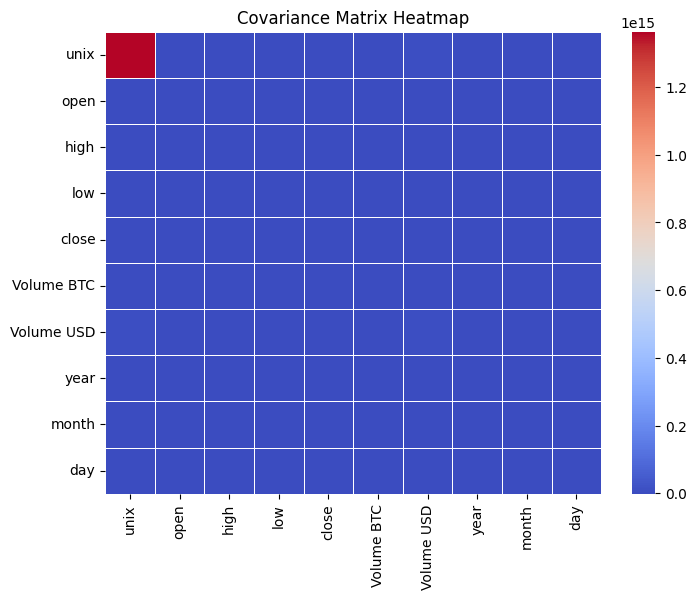

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [29]:

df_cleaned1['unix'] = pd.to_numeric(df_cleaned1['unix'], errors='coerce')


correlation_matrix = df_cleaned1.select_dtypes(include=['number']).corr()
print(correlation_matrix)

<ipython-input-29-5809814db9ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['unix'] = pd.to_numeric(df_cleaned1['unix'], errors='coerce')


                unix      open      high       low     close  Volume BTC  \
unix        1.000000  0.879618  0.879414  0.879843  0.879618   -0.054744   
open        0.879618  1.000000  0.999993  0.999991  0.999992   -0.060296   
high        0.879414  0.999993  1.000000  0.999979  0.999993   -0.059809   
low         0.879843  0.999991  0.999979  1.000000  0.999992   -0.060951   
close       0.879618  0.999992  0.999993  0.999992  1.000000   -0.060355   
Volume BTC -0.054744 -0.060296 -0.059809 -0.060951 -0.060355    1.000000   
Volume USD  0.089724  0.163901  0.166109  0.161021  0.163856   -0.013003   
year        0.983796  0.887749  0.887572  0.887946  0.887750   -0.029859   
month      -0.589927 -0.621189 -0.621174 -0.621211 -0.621193   -0.076058   
day         0.020371  0.021362  0.021360  0.021364  0.021359   -0.009049   

            Volume USD      year     month       day  
unix          0.089724  0.983796 -0.589927  0.020371  
open          0.163901  0.887749 -0.621189  0.021362 

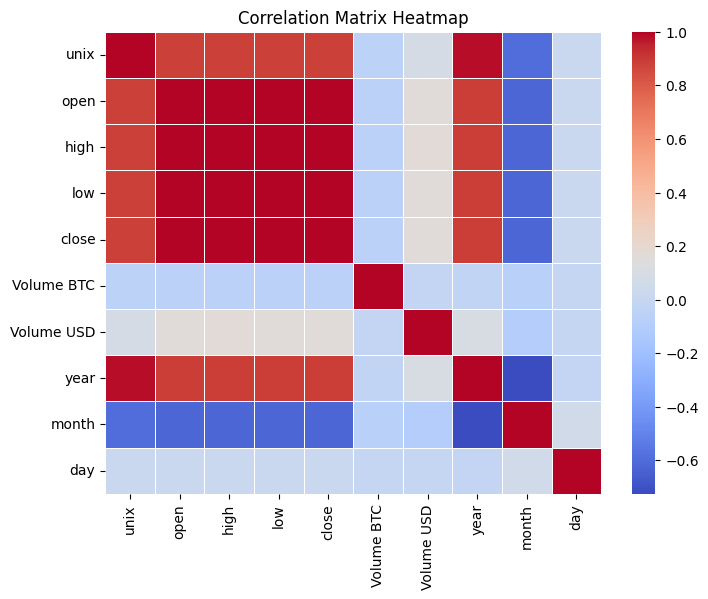

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

***EDA:***

In [31]:
df_cleaned1['open'].describe()

count    557109.000000
mean      16442.565838
std       14931.026767
min        3124.450000
25%        6539.080000
50%        8763.140000
75%       22780.000000
max       68635.050000
Name: open, dtype: float64

<Axes: ylabel='Density'>

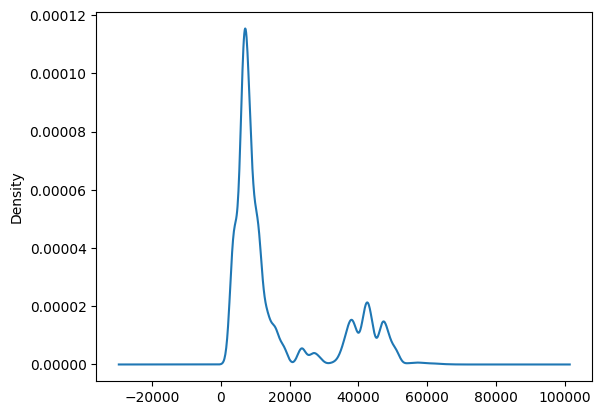

In [32]:
df_cleaned1['open'].plot(kind='kde')

In [33]:
df_cleaned1['open'].skew()

1.218285052440898

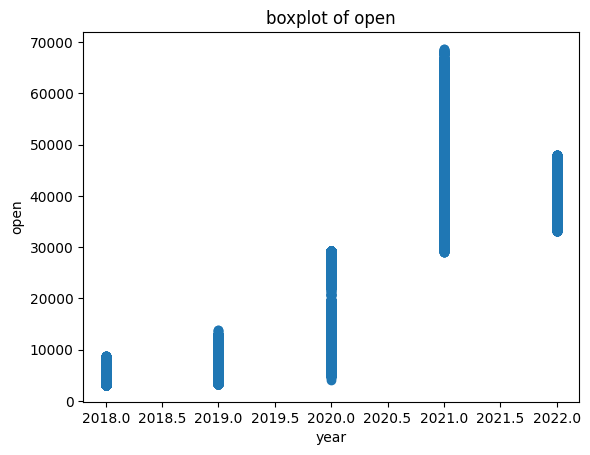

In [34]:
plt.scatter(df_cleaned1['year'],df_cleaned1['open'])
plt.xlabel('year')
plt.ylabel('open')
plt.title('boxplot of open')
plt.show()

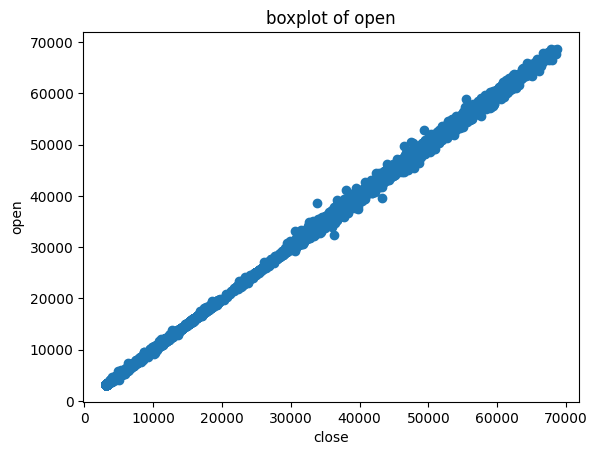

In [35]:
plt.scatter(df_cleaned1['close'],df_cleaned1['open'])
plt.xlabel('close')
plt.ylabel('open')
plt.title('boxplot of open')
plt.show()

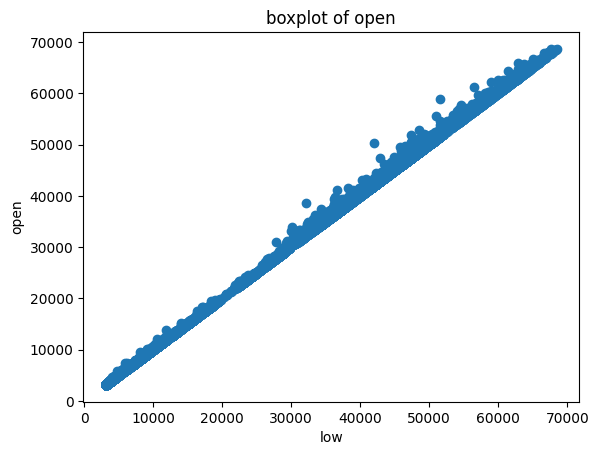

In [36]:
plt.scatter(df_cleaned1['low'],df_cleaned1['open'])
plt.xlabel('low')
plt.ylabel('open')
plt.title('boxplot of open')
plt.show()

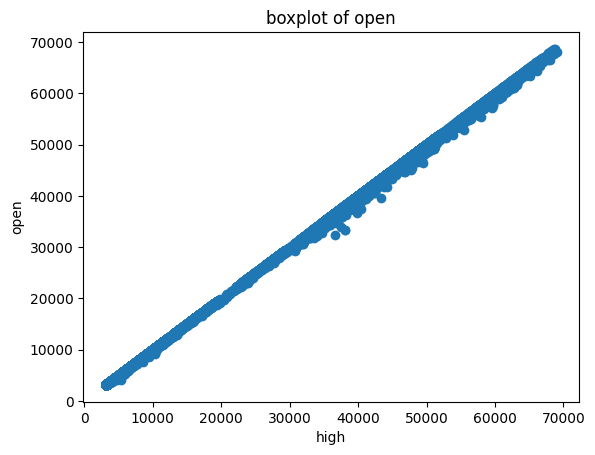

In [37]:
plt.scatter(df_cleaned1['high'],df_cleaned1['open'])
plt.xlabel('high')
plt.ylabel('open')
plt.title('boxplot of open')
plt.show()

In [38]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['open1'] = pt.fit_transform(df_cleaned1[['open']])
df_cleaned1['open1'].skew()


<ipython-input-38-e367e1ea88bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['open1'] = pt.fit_transform(df_cleaned1[['open']])


0.11098668228002545

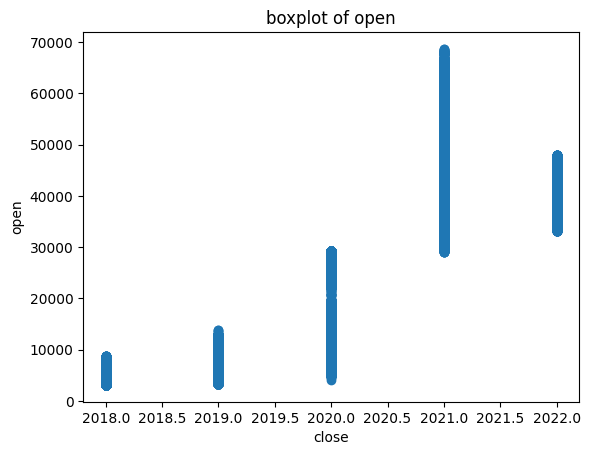

In [39]:
plt.scatter(df_cleaned1['year'],df_cleaned1['open'])
plt.xlabel('close')
plt.ylabel('open')
plt.title('boxplot of open')
plt.show()

In [40]:
#CONCLUSION-this concludes that outliers are not present in open column and skewness is not indicating any outliers

In [41]:
df_cleaned1['high'].describe()

count    557109.000000
mean      16456.122399
std       14946.218495
min        3131.860000
25%        6540.260000
50%        8769.760000
75%       22802.850000
max       69000.000000
Name: high, dtype: float64

<Axes: ylabel='Density'>

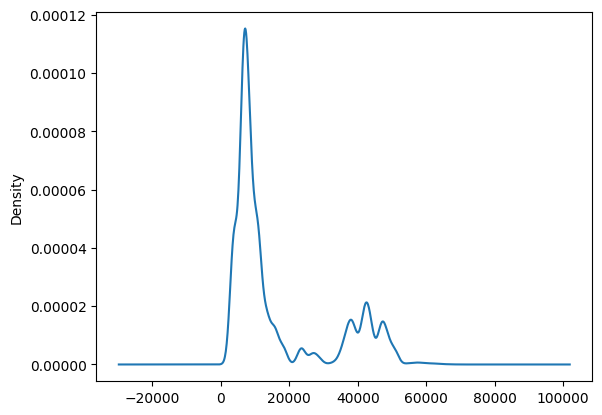

In [42]:
df_cleaned1['high'].plot(kind='kde')

In [43]:
df_cleaned1['high'].skew()

1.2190463001898344

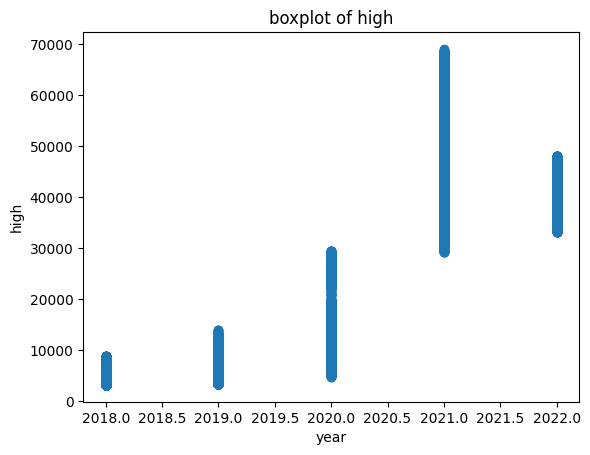

In [44]:
plt.scatter(df_cleaned1['year'],df_cleaned1['high'])
plt.xlabel('year')
plt.ylabel('high')
plt.title('boxplot of high')
plt.show()

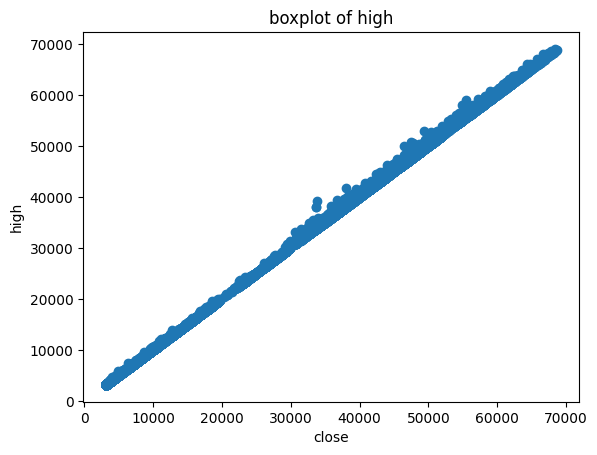

In [45]:
plt.scatter(df_cleaned1['close'],df_cleaned1['high'])
plt.xlabel('close')
plt.ylabel('high')
plt.title('boxplot of high')
plt.show()

In [46]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['high1'] = pt.fit_transform(df_cleaned1[['high']])
df_cleaned1['high1'].skew()


<ipython-input-46-8db99df69954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['high1'] = pt.fit_transform(df_cleaned1[['high']])


0.11108922967855378

In [47]:
df_cleaned1['low'].describe()

count    557109.000000
mean      16428.367086
std       14914.588771
min        3122.280000
25%        6537.970000
50%        8757.840000
75%       22753.060000
max       68447.000000
Name: low, dtype: float64

<Axes: ylabel='Density'>

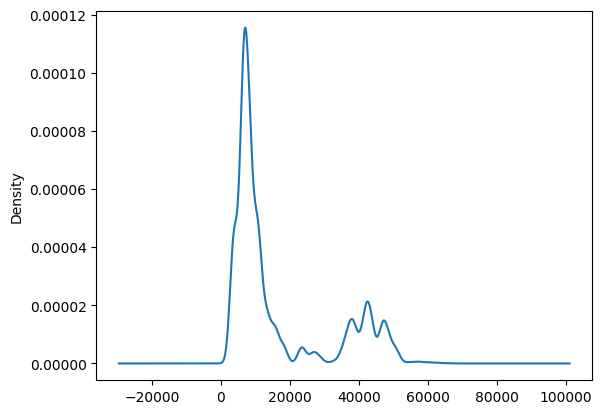

In [48]:
df_cleaned1['low'].plot(kind='kde')

In [49]:
df_cleaned1['low'].skew()

1.217462346065769

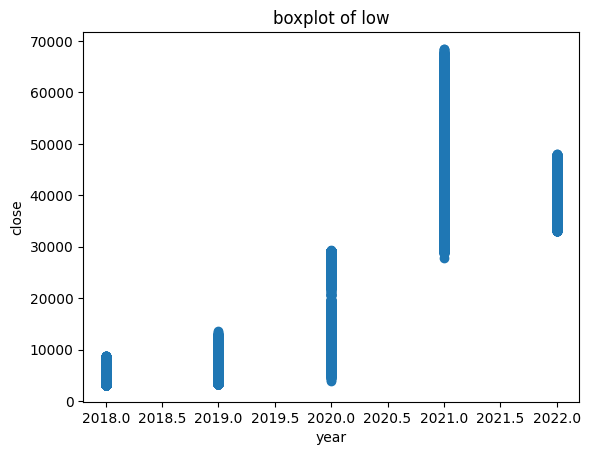

In [50]:
plt.scatter(df_cleaned1['year'],df_cleaned1['low'])
plt.xlabel('year')
plt.ylabel('close')
plt.title('boxplot of low')
plt.show()

In [51]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['low1'] = pt.fit_transform(df_cleaned1[['low']])
df_cleaned1['low1'].skew()


<ipython-input-51-f8a2b00fdbca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['low1'] = pt.fit_transform(df_cleaned1[['low']])


0.11086986272225549

In [52]:
df_cleaned1['close'].describe()

count    557109.000000
mean      16442.686561
std       14931.138923
min        3124.450000
25%        6539.230000
50%        8763.480000
75%       22779.940000
max       68627.010000
Name: close, dtype: float64

<Axes: ylabel='Density'>

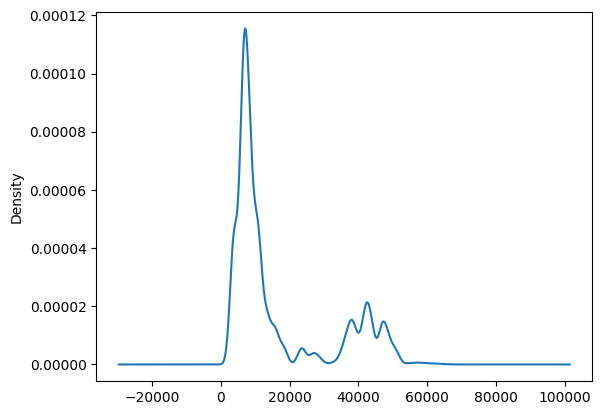

In [53]:
df_cleaned1['close'].plot(kind='kde')

In [54]:
df_cleaned1['close'].skew()

1.218262384300964

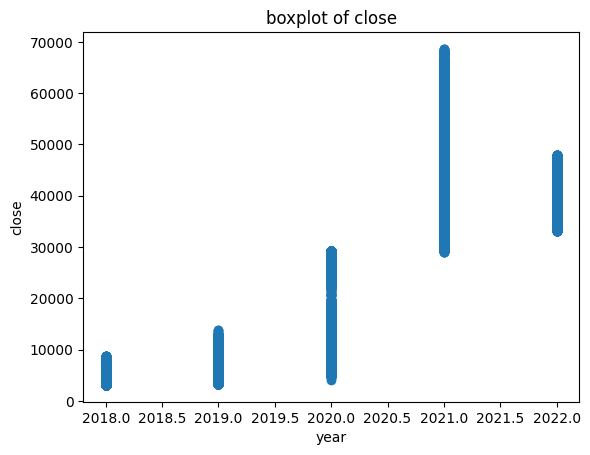

In [55]:
plt.scatter(df_cleaned1['year'],df_cleaned1['close'])
plt.xlabel('year')
plt.ylabel('close')
plt.title('boxplot of close')
plt.show()

In [56]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['close1'] = pt.fit_transform(df_cleaned1[['close']])
df_cleaned1['close1'].skew()


<ipython-input-56-cd785b6b5180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['close1'] = pt.fit_transform(df_cleaned1[['close']])


0.11100024321724275

In [57]:
df_cleaned1['Volume BTC'].describe()

count    5.571090e+05
mean     9.626200e+04
std      8.488191e+05
min      0.000000e+00
25%      1.256519e-01
50%      9.663555e-01
75%      4.726783e+00
max      6.857061e+07
Name: Volume BTC, dtype: float64

<Axes: ylabel='Density'>

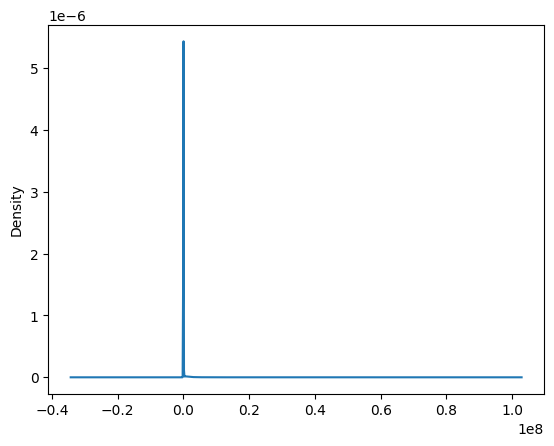

In [58]:
df_cleaned1['Volume BTC'].plot(kind='kde')

In [59]:
df_cleaned1['Volume BTC'].skew()

21.467955637285385

In [60]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with a 'volume btc' column
Q1 = df_cleaned1['Volume BTC'].quantile(0.25)
Q3 = df_cleaned1['Volume BTC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)

Lower Bound for Outliers: -6.776044365
Upper Bound for Outliers: 11.628479115


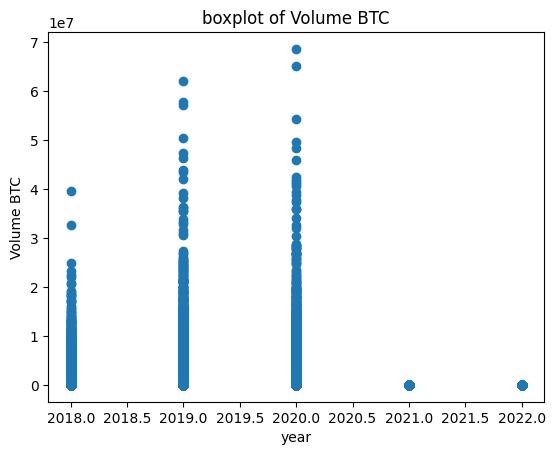

In [61]:
plt.scatter(df_cleaned1['year'],df_cleaned1['Volume BTC'])
plt.xlabel('year')
plt.ylabel('Volume BTC')
plt.title('boxplot of Volume BTC')
plt.show()

In [62]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['Volumebtc'] = pt.fit_transform(df_cleaned1[['Volume BTC']])
df_cleaned1['Volumebtc'].skew()



<ipython-input-62-03bf3f89aab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['Volumebtc'] = pt.fit_transform(df_cleaned1[['Volume BTC']])


0.6414809366942668

In [63]:

from scipy import stats

# Calculate z-scores for 'volume btc'
df_cleaned1['z_score_volume'] = stats.zscore(df_cleaned1['Volume BTC'])

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 1.5

# Identify outliers
outliers = df_cleaned1[(df_cleaned1['z_score_volume'] > threshold) | (df_cleaned1['z_score_volume'] < -threshold)]

# Remove outliers (choose one of the following methods)

# Method 1: Filtering
df_filtered = df_cleaned1[(df_cleaned1['z_score_volume'] <= threshold) & (df_cleaned1['z_score_volume'] >= -threshold)]



<ipython-input-63-c83a689ccfcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['z_score_volume'] = stats.zscore(df_cleaned1['Volume BTC'])


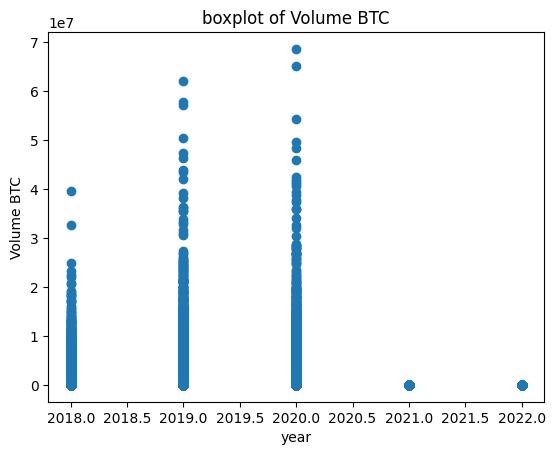

In [64]:
plt.scatter(df_cleaned1['year'],df_cleaned1['Volume BTC'])
plt.xlabel('year')
plt.ylabel('Volume BTC')
plt.title('boxplot of Volume BTC')
plt.show()

In [65]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['Volumebtc'] = pt.fit_transform(df_cleaned1[['Volume BTC']])
df_cleaned1['Volumebtc'].skew()



<ipython-input-65-03bf3f89aab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['Volumebtc'] = pt.fit_transform(df_cleaned1[['Volume BTC']])


0.6414809366942668

In [66]:
df_cleaned1['Volume USD'].describe()

count    5.571090e+05
mean     2.226194e+05
std      1.924622e+06
min      0.000000e+00
25%      1.021601e+03
50%      8.708724e+03
75%      4.121276e+04
max      2.582324e+08
Name: Volume USD, dtype: float64

<Axes: ylabel='Density'>

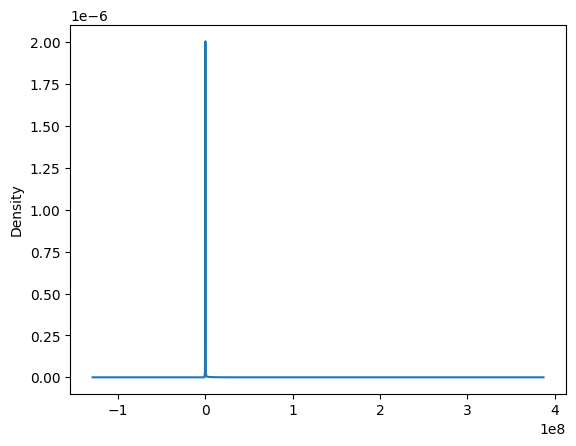

In [67]:
df_cleaned1['Volume USD'].plot(kind='kde')

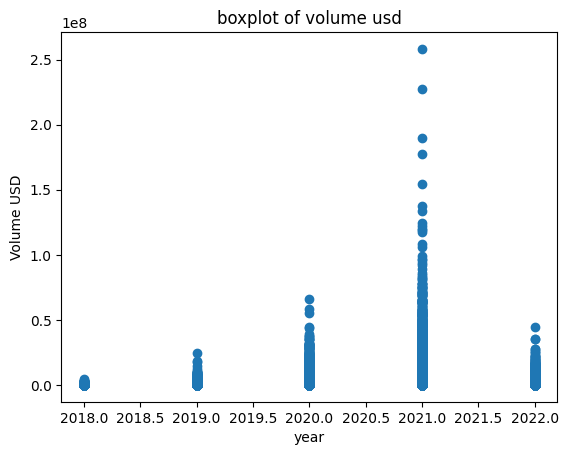

In [68]:
plt.scatter(df_cleaned1['year'],df_cleaned1['Volume USD'])
plt.xlabel('year')
plt.ylabel('Volume USD')
plt.title('boxplot of volume usd')
plt.show()

In [69]:
df_cleaned1['Volume USD'].skew()

30.054762564858603

In [70]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned1['VolumeUSD'] = pt.fit_transform(df_cleaned1[['Volume USD']])
df_cleaned1['VolumeUSD'].skew()



<ipython-input-70-582f00b0514c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['VolumeUSD'] = pt.fit_transform(df_cleaned1[['Volume USD']])


0.04012583402969542

In [71]:

from scipy import stats

# Calculate z-scores for 'volume btc'
df_cleaned1['z_score_volume1'] = stats.zscore(df_cleaned1['Volume USD'])

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 2.5

# Identify outliers
outliers = df_cleaned1[(df_cleaned1['z_score_volume1'] > threshold) | (df_cleaned1['z_score_volume1'] < -threshold)]

# Remove outliers (choose one of the following methods)

# Method 1: Filtering
df_filtered = df_cleaned1[(df_cleaned1['z_score_volume1'] <= threshold) & (df_cleaned1['z_score_volume1'] >= -threshold)]



<ipython-input-71-bf02380c56e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1['z_score_volume1'] = stats.zscore(df_cleaned1['Volume USD'])


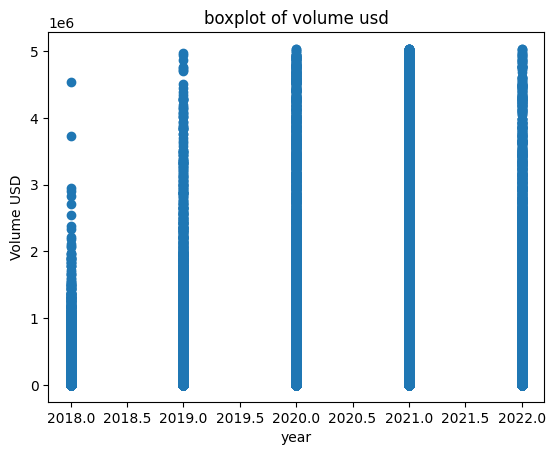

In [72]:
plt.scatter(df_filtered['year'],df_filtered['Volume USD'])
plt.xlabel('year')
plt.ylabel('Volume USD')
plt.title('boxplot of volume usd')
plt.show()

In [73]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550993 entries, 33258 to 0
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   unix             550993 non-null  int64         
 1   date             550993 non-null  datetime64[ns]
 2   symbol           550993 non-null  object        
 3   open             550993 non-null  float64       
 4   high             550993 non-null  float64       
 5   low              550993 non-null  float64       
 6   close            550993 non-null  float64       
 7   Volume BTC       550993 non-null  float64       
 8   Volume USD       550993 non-null  float64       
 9   year             550993 non-null  int32         
 10  month            550993 non-null  int32         
 11  day              550993 non-null  int32         
 12  time             550993 non-null  object        
 13  open1            550993 non-null  float64       
 14  high1            550993 no

In [74]:
df_filteredcopy=df_filtered.copy()

In [75]:
df_filtered1=df_filtered.drop(columns=['open','low','high','close','Volume BTC','Volume USD','Volumebtc','VolumeUSD'])

In [76]:
df_filtered1

,unix,date,symbol,year,month,day,time,open1,high1,low1,close1,z_score_volume,z_score_volume1
33258,1526364000,2018-05-15 06:00:00,BTC/USD,2018,5,15,06:00:00,-0.217389,-0.207888,-0.220889,-0.216196,5.667103,-0.115378
33257,1526367600,2018-05-15 07:00:00,BTC/USD,2018,5,15,07:00:00,-0.216196,-0.212987,-0.218567,-0.216528,2.702742,-0.115527
33256,1526371200,2018-05-15 08:00:00,BTC/USD,2018,5,15,08:00:00,-0.216529,-0.215611,-0.228777,-0.218288,9.295041,-0.115192
33255,1526374800,2018-05-15 09:00:00,BTC/USD,2018,5,15,09:00:00,-0.218289,-0.214921,-0.221886,-0.221673,1.764488,-0.115574
33254,1526378400,2018-05-15 10:00:00,BTC/USD,2018,5,15,10:00:00,-0.221674,-0.196624,-0.222936,-0.207054,12.965097,-0.115014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1646105880,2022-03-01 03:38:00,BTC/USD,2022,3,1,03:38:00,1.486527,1.485852,1.486755,1.486022,-0.113407,-0.115172
3,1646105940,2022-03-01 03:39:00,BTC/USD,2022,3,1,03:39:00,1.485783,1.485107,1.485881,1.485147,-0.113406,-0.097328
2,1646106000,2022-03-01 03:40:00,BTC/USD,2022,3,1,03:40:00,1.485557,1.484881,1.486171,1.485437,-0.113407,-0.115463
1,1646106060,2022-03-01 03:41:00,BTC/USD,2022,3,1,03:41:00,1.485487,1.485306,1.486210,1.485971,-0.113407,-0.112471


In [77]:
df_filtered1 = df_filtered1.rename(columns={'z_score_volume': 'Volume BTC'})

In [78]:
df_filtered1 = df_filtered1.rename(columns={'z_score_volume1': 'Volume USD'})

In [79]:
df_filtered1 = df_filtered1.rename(columns={'open1': 'Open'})

In [80]:
df_filtered1 = df_filtered1.rename(columns={'close1': 'Close'})

In [81]:
df_filtered1 = df_filtered1.rename(columns={'high1': 'High'})

In [82]:
df_filtered1 = df_filtered1.rename(columns={'low1': 'Low'})

<Axes: xlabel='Open', ylabel='Close'>

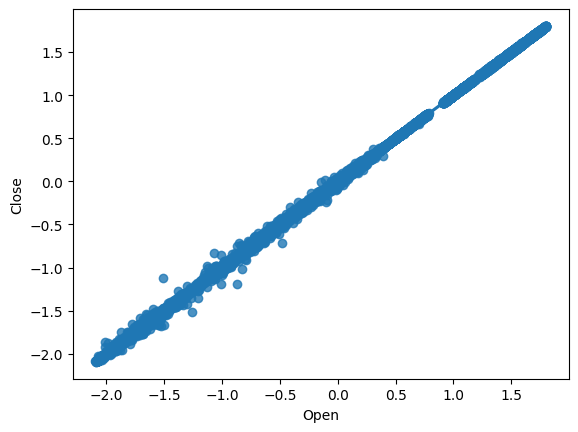

In [83]:
import seaborn as sns

sns.regplot(x='Open', y='Close', data=df_filtered1)

<Axes: xlabel='High', ylabel='Low'>

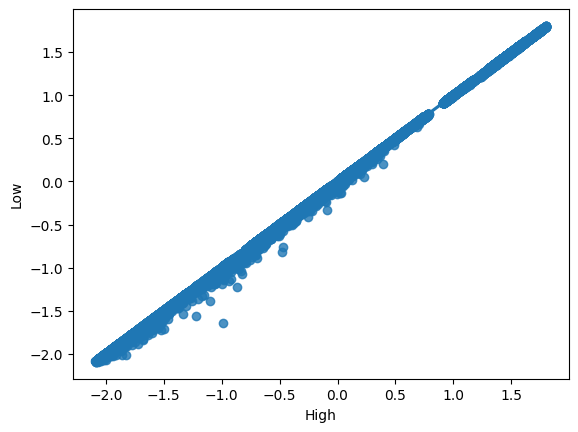

In [84]:
import seaborn as sns

sns.regplot(x='High', y='Low', data=df_filtered1)

<Axes: xlabel='Volume BTC', ylabel='Volume USD'>

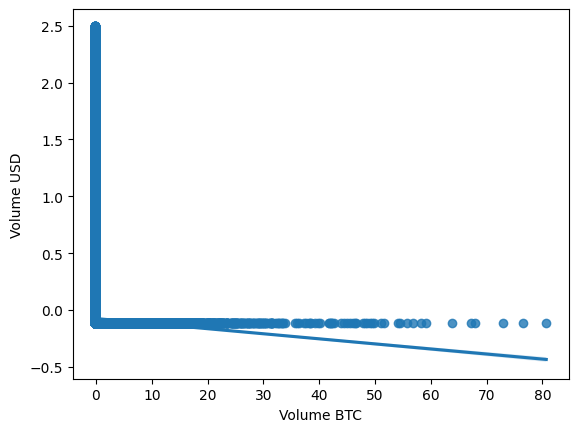

In [85]:
import seaborn as sns

sns.regplot(x='Volume BTC', y='Volume USD', data=df_filtered1)

In [86]:
correlation1 = df_filtered1['Open'].corr(df_filtered1['Close'])
print(correlation1)

0.9999957775698769


In [87]:
correlation2 = df_filtered1['Low'].corr(df_filtered1['High'])
print(correlation2)

0.999990130994834


In [88]:
correlation = df_filtered1['Volume BTC'].corr(df_filtered1['Volume USD'])
print(correlation)

-0.025931285733137417


In [89]:
correlation = df_filtered1['Volume USD'].corr(df_filtered1['Close'])
print(correlation)

0.15974105499411528


In [90]:
correlation = df_filtered1['Volume BTC'].corr(df_filtered1['Close'])
print(correlation)

-0.0382582213246007


In [91]:
from scipy.stats import spearmanr


correlation, p_value = spearmanr(df_filtered1['Volume BTC'], df_filtered1['Volume USD'])

print("Spearman's Rank Correlation:", correlation)
print("P-value:", p_value)

Spearman's Rank Correlation: 0.7791021050008077
P-value: 0.0


In [92]:
#this suggests relationship between Volume BTC and Volume USD is strong and positive but non -linear

In [93]:
from scipy.stats import spearmanr


correlation, p_value = spearmanr(df_filtered1['Volume USD'], df_filtered1['Close'])

print("Spearman's Rank Correlation:", correlation)
print("P-value:", p_value)

Spearman's Rank Correlation: 0.21384638027035946
P-value: 0.0


In [94]:
from scipy.stats import spearmanr
correlation,p_value=spearmanr(df_filtered1['Volume BTC'],df_filtered1['Close'])
print("Spearman's Rank Correlation:",correlation)
print("P-value:",p_value)


Spearman's Rank Correlation: -0.11854131207113763
P-value: 0.0


CONCLUSION-From analysis we get to know that realtionship between Volume BTC and Volume USD is NON linear but these both affect each other but other parameters very slightly  affect Volume BTC and moves in negative direction with Volume BTC and other parameters very slightly affect Volume USD and moves in positive direction with VOlume USD

In [ ]:



sns.lmplot(x='Volume BTC', y='Open', data=df_filtered1, lowess=True)  # Use lowess=True for a non-linear trend line
plt.title('Scatter Plot with Trend Line')
plt.xlabel('Volume BTC')
plt.ylabel('Open')
plt.show()

In [ ]:



sns.lmplot(x='Volume BTC', y='Volume USD', data=df_filtered1, lowess=True)  # Use lowess=True for a non-linear trend line
plt.title('Scatter Plot with Trend Line')
plt.xlabel('Volume BTC')
plt.ylabel('Volume USD')
plt.show()

In [ ]:



sns.lmplot(x='Volume USD', y='Open', data=df_filtered1, lowess=True)  # Use lowess=True for a non-linear trend line
plt.title('Scatter Plot with Trend Line')
plt.xlabel('Volume USD')
plt.ylabel('Open')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

    # Assuming a quadratic relationship
    model = smf.ols('Volume USD ~ Volume BTC + I(Volume BTC**2)', data=df_filtered1).fit()
    print(model.summary())

In [ ]:
# Create lagged features
df_filtered1['Open_Lag1'] = df_filtered1['Open'].shift(1)
df_filtered1['High_Lag1'] = df_filtered1['High'].shift(1)
df_filtered1['Low_Lag1'] = df_filtered1['Low'].shift(1)
df_filtered1['Close_Lag1'] = df_filtered1['Close'].shift(1)

In [ ]:
df_filtered1['Close_MA15'] = df_filtered1['Close'].rolling(window=15).mean()
df_filtered1['Close_MA30'] = df_filtered1['Close'].rolling(window=30).mean()
df_filtered1['Open_MA15'] = df_filtered1['Open'].rolling(window=15).mean()
df_filtered1['Open_MA30'] = df_filtered1['Open'].rolling(window=30).mean()
df_filtered1['high_MA15'] = df_filtered1['High'].rolling(window=15).mean()
df_filtered1['high_MA30'] = df_filtered1['High'].rolling(window=30).mean()
df_filtered1['Low_MA15'] = df_filtered1['Low'].rolling(window=15).mean()
df_filtered1['Low_MA15'] = df_filtered1['Low'].rolling(window=30).mean()

In [ ]:
import talib as ta
df_filtered1['RSI'] = ta.RSI(np.array(df_filtered1['Close']), timeperiod=14)


In [ ]:

df_filtered1['DayOfWeek'] = df_filtered1['unix'].dt.dayofweek